<h2> Imports </h2>

In [1]:
import pandas as pd
pd.set_option('use_inf_as_na', True)
import numpy as np
from scipy.spatial import distance
from matplotlib import pyplot
from collections import Counter
from sklearn.model_selection import StratifiedKFold, KFold
from numpy import mean
from numpy import std
import xgboost as xgb
from pandas import read_csv
from sklearn.preprocessing import RobustScaler, OneHotEncoder, MinMaxScaler, PowerTransformer, StandardScaler
from scipy.stats import normaltest
from sklearn.model_selection import ParameterSampler
from numpy.random import randn
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from numpy import *
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats.stats import pearsonr, spearmanr
from scipy import stats
import tensorflow as tf
import multiprocessing as mp
import time
from sklearn.metrics.cluster import normalized_mutual_info_score
import os
from sklearn.svm import SVR
import collections
import matplotlib.pyplot as plt
from collections import OrderedDict
import category_encoders as ce
import itertools as it
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import re
import warnings
warnings.filterwarnings("ignore")

Problem 1. If we used the full test data, eeflux will only appear in a small sub range since the mapped data size would
not exceed 100-200 rows maximum. Thus the graph would not look nice.

Solution 1: We use the mapped data set for the test
    
  

Problem 2: For the x-axis, if we wanted to use all the years, the graph seemed very overlapping, and
    we could not interprate anything
 

Solution 2

In [2]:
physical_output = 'Eeflux_ET'
# real_output = 'LE_bowen_corr_mm'
# predicted_output = 'LE_bowen_corr_pred

real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'

def export_model(path):
    df_test = pd.read_csv(path, delimiter=',')
#     if 'Date' in df_test.columns:
#         df_test['Date'] = pd.to_datetime(df_test.Date)
#         df_test.sort_values(by=['Date'], inplace=True, ascending=True)
#         df_test = df_test.set_index('Date')
    return df_test

def export_physics(path):
    df_test = pd.read_csv(path, delimiter=',')
    df_test['Date'] = pd.to_datetime(df_test.Date)
    df_test.sort_values(by=['Date'], inplace=True, ascending=True)
    df_test = df_test.set_index('Date')
    df_test.loc[(df_test[physical_output] < 0.3), physical_output] = 0.3
    df_test.loc[(df_test[physical_output] > 15), physical_output] = 15
    return df_test

base_path = "/Users/saraawad/Desktop/Plots/Plot1/"
columns = []
columnsToTake = ['TA', 'TA-1', 'TA-2', 'TA-3', 'TA-4', 'TA-5',
       'EEflux LST', 'EEflux LST-1', 'EEflux LST-2', 'EEflux LST-3',
       'EEflux LST-4', 'EEflux LST-5', 'WS', 'WS-1', 'WS-2', 'RH', 'RH-1',
       'RH-2', 'RH-3', 'EEflux NDVI', 'EEflux NDVI-1', 'EEflux NDVI-2',
       'EEflux Albedo', 'EEflux Albedo-1', 'EEflux Albedo-2', 'Site Id_1',
       'Site Id_2', 'Site Id_3', 'Site Id_4', 'Site Id_5', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Site Id', 'LE_bowen_corr(mm)',
       'LE_bowen_corr(mm)_predicted', 'Date']

input_path = base_path + "best_model.csv"
df_test1 = export_model(input_path)
columns.append(np.array(df_test1[real_output]))
columns.append(np.array(df_test1[predicted_output]))
df_test1 = df_test1[columnsToTake]
df_test1["Best predicted"] = df_test1[predicted_output]
df_test1["Type"] = 1

input_path = base_path + "base_model.csv"
df_test2 = export_model(input_path)
columns.append(np.array(df_test2[predicted_output]))
df_test2 = df_test2[columnsToTake]
df_test2["Base predicted"] = df_test2[predicted_output]
df_test2["Type"] = 2


df_all = pd.concat([df_test1, df_test2], axis=1)
columnsToTake.append('Best predicted')
columnsToTake.append('Base predicted')
df_all = df_all[columnsToTake]
df_all = df_all.loc[:,~df_all.columns.duplicated()]
# df_all = pd.merge(df_test1, df_test2, left_on=['Site Id', 'Date'], 
#                          right_on=['Site Id', 'Date'], how="inner")

# df_all = pd.merge(df_test1, df_test2, on=['Site Id', 'Date'], how='left')
print(df_all.shape, df_all.columns)

# input_path = "/Users/saraawad/Desktop/Residuals/fs_meta_all_output_residual.csv"
# df_test3 = export_physics(input_path)
# columns.append(np.array(df_test3[physical_output]))
# df_test3["Type"] = 3


len(df_all['Date'].unique())

df_all['Date'] = pd.to_datetime(df_all.Date)
df_all.sort_values(by=['Date'], inplace=True, ascending=True)
df_all = df_all.set_index('Date')
df_all = df_all

columnsToPlot = ['LE_bowen_corr(mm)', 'Best predicted','Base predicted']
for i in range(len(columns)):
    column = columns[i]
    plt.plot(df_all.index.values, np.array(column))
#     # EEflux
#     if i == len(columns)-1:
#         plt.plot(np.array(column), marker='.', lineStyle='')
#     else:
#         plt.plot(np.array(column))
    
labels = ["Actual ET", "MLP-Reptile", "MLP"]
plt.legend(labels, loc="upper right")
plt.xlabel('Date')
plt.ylabel('ET (mm)')
# plt.xlim([2000, 2018])
# plt.xticks(years)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/saraawad/Desktop/Plots/Plot1/best_model.csv'

# Scatter Plot for All Clusters: Experiment A

(2, 3)


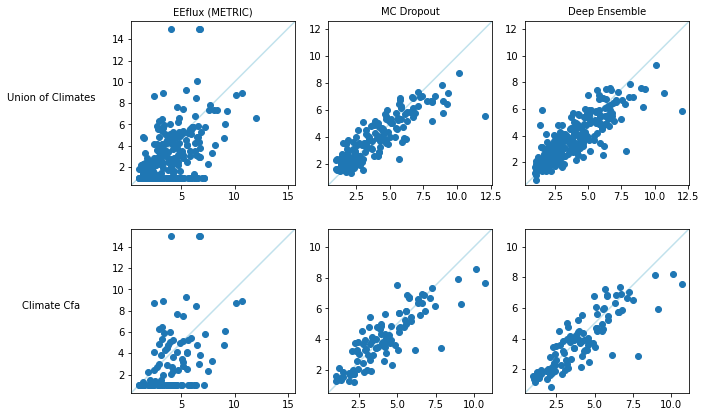

In [6]:
base_path = "/Users/saraawad/Desktop/PlotOutput/Scatter/Experiment A/Point/"
base_path = "/Users/saraawad/Desktop/PlotOutput/Scatter/Experiment A/Proba/"

def plot_actual_vs_predicted_scatter_bisector_stacked(y_test_list, y_predict_list, titles, figure_name):
    figures_count = len(y_test_list)
    columns = 3
    rows = 2
#     fig, axs = plt.subplots(rows, columns, figsize=(10,10))
    fig, axs = plt.subplots(rows, columns, figsize=(10, 7))
    print(axs.shape)
    index = 0
    for row in range(rows):
        for column in range(columns):
            y_test = y_test_list[index]
            y_predict = y_predict_list[index]
            row_plt = row
            col_plt = column
            index+=1
            if column == 0 and row == 0:
                axs[row_plt, col_plt].set_title(titles[column], fontsize='medium') 
            elif column == 1 and row == 0:
                axs[row_plt, col_plt].set_title(titles[column], fontsize='medium') 
            elif column == 2 and row == 0:
                axs[row_plt, col_plt].set_title(titles[column], fontsize='medium') 
            
            if column == 0 and row == 0:
                axs[row_plt, col_plt].set_ylabel('Union of Climates', fontsize='medium', rotation=360, labelpad=60) 
#                 axs[row_plt, col_plt].set_ylabel('Union of Climates \n\n (Rows: 3,273)',
#                                                  labelpad=60,
#                                                  fontsize='medium',
#                                                  rotation=360) 
            elif column == 0 and row == 1:
                axs[row_plt, col_plt].set_ylabel('Climate Cfa', fontsize='medium', rotation=360, labelpad=60) 
#                 axs[row_plt, col_plt].set_ylabel('Climate Cfa \n\n (Rows: 1,093)',
#                                                  labelpad=60,
#                                                  fontsize='medium',
#                                                  rotation=360) 
#             elif column == 0 and row == 2:
#                 axs[row_plt, col_plt].set_ylabel('Climate Cwa (202)', fontsize='medium') 
            axs[row_plt, col_plt].scatter(y_test, y_predict)
            lims = [
                   np.min([axs[row_plt, col_plt].get_xlim(), axs[row_plt, col_plt].get_ylim()]),  # min of both axes
                   np.max([axs[row_plt, col_plt].get_xlim(), axs[row_plt, col_plt].get_ylim()]),  # max of both axes
            ]
            axs[row_plt, col_plt].plot(lims, lims, 'k-', c='lightblue', alpha=0.75, zorder=0)
            axs[row_plt, col_plt].set_aspect('equal')
            axs[row_plt, col_plt].set_xlim(lims)
            axs[row_plt, col_plt].set_ylim(lims)
            
#             fig.patch.set_edgecolor('black')  
#             fig.patch.set_linewidth('1')

#     plt.rcParams["axes.edgecolor"] = "black"
#     plt.rcParams["axes.linewidth"]  = 1.25
    output_path = "/Users/saraawad/Desktop/PlotOutput/Figures/"
    plt.savefig(output_path + figure_name + '.png')
    plt.show()

y_test_list, y_predict_list = [], []

physical_output = 'Eeflux_ET'
# real_output = 'LE_bowen_corr_mm'
real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'
# predicted_output = 'LE_bowen_corr_pred'

site_id = "US-Kon"

def export_physics(path):
    df_test = pd.read_csv(path, delimiter=',')
#     df_test = df_test[df_test['Site Id'] == site_id]
    df_test.loc[(df_test[physical_output] < 1), physical_output] = 1
    df_test.loc[(df_test[physical_output] > 15), physical_output] = 15
#     df_test[physical_output] = df_test[physical_output].between(1, 15)
    test_list = [np.array(df_test[real_output])]
    predict_list = [np.array(df_test[physical_output])]
    return test_list, predict_list

def export_model(path):
    df_test = pd.read_csv(path, delimiter=',')
#     df_test = df_test[df_test['Site Id'] == site_id]
    df_test.loc[(df_test[physical_output] < 1), physical_output] = 1
    df_test.loc[(df_test[physical_output] > 15), physical_output] = 15
#     df_test[physical_output] = df_test[physical_output].between(1, 15)
    df_test[predicted_output] = df_test[predicted_output].str.strip('[]').astype(float)
    test_list = [np.array(df_test[real_output])]
    predict_list = [np.array(df_test[predicted_output])]
    return test_list, predict_list


# Row 1: Worst is Union
# Physics Model
input_path = base_path + "meta_all_fs2_output_residual.csv"
input_path = base_path + "deepensemble_fs2_all_output_residual.csv"
test_list, predict_list = export_physics(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

# Base Model
input_path = base_path + "mlp_all_fs2_output_residual.csv"
input_path = base_path + "mcdropout_fs2_all_output_residual.csv"
test_list, predict_list = export_model(input_path)
# df_test[predicted_output] = df_test[predicted_output].str.strip('[]').astype(float)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)
    
# Best Model
input_path = base_path + "meta_all_fs2_output_residual.csv"
input_path = base_path + "deepensemble_fs2_all_output_residual.csv"
test_list, predict_list = export_model(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

######################################
# Row 2: Cfa
# Physics Model
input_path = base_path + "meta_cfa_fs2_output_residual.csv"
input_path = base_path + "deepensemble_fs2_cfa_output_residual.csv"
test_list, predict_list = export_physics(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

# Base Model
input_path = base_path + "mlp_cfa_fs2_output_residual.csv"
input_path = base_path + "mdropout_fs2_cfa_output_residual.csv"
test_list, predict_list = export_model(input_path)
# df_test[predicted_output] = df_test[predicted_output].str.strip('[]').astype(float)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)
    
# Best Model
input_path = base_path + "meta_cfa_fs2_output_residual.csv"
input_path = base_path + "deepensemble_fs2_cfa_output_residual.csv"
test_list, predict_list = export_model(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)


######################################

# Row 2: Cwa
# Physics Model
# input_path = base_path + "meta_cwa_fs2_output_residual.csv"
# test_list, predict_list = export_physics(input_path)
# y_test_list.extend(test_list)
# y_predict_list.extend(predict_list)

# # Base Model
# input_path = base_path + "mlp_cwa_fs2_output_residual.csv"
# df_test = pd.read_csv(input_path, delimiter=',')
# df_test.loc[(df_test[physical_output] < 0.3), physical_output] = 0.3
# df_test.loc[(df_test[physical_output] > 15), physical_output] = 15

# test_list = [np.array(df_test[real_output])]
# predict_list = [np.array(df_test[predicted_output])]
# y_test_list.extend(test_list)
# y_predict_list.extend(predict_list)
    
# # Best Model
# input_path = base_path + "meta_cwa_fs2_output_residual.csv"

# test_list, predict_list = export_model(input_path)
# y_test_list.extend(test_list)
# y_predict_list.extend(predict_list)


titles = ['EEflux (METRIC)', 'MC Dropout', 'Deep Ensemble']
# titles = ['EEflux (METRIC)', 'MLP', 'MLP-Reptile']
plot_actual_vs_predicted_scatter_bisector_stacked(y_test_list, y_predict_list, titles, 'experimentA_scatter')

# Scatter Plot: Compare All Residuals for Union

3 3


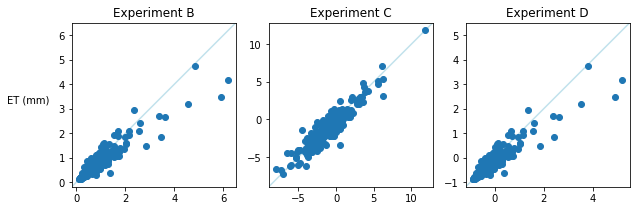

In [8]:
base_path = "/Users/saraawad/Desktop/PlotOutput/Scatter/Experiment B/Point/"
# base_path = "/Users/saraawad/Desktop/PlotOutput/Scatter/Experiment B/Proba/"
def plot_actual_vs_predicted_scatter_bisector_stacked(y_test_list, y_predict_list, titles):
    figures_count = len(y_test_list)
    columns = 3
    fig, axs = plt.subplots(1, columns, figsize=(10,10))
    axs = axs.reshape(1, 3)
    index = 0
    for column in range(columns):
        y_test = y_test_list[index]
        y_predict = y_predict_list[index]
        row_plt = 0
        col_plt = column
        index+=1
        if column == 0:
            axs[row_plt, col_plt].set_ylabel('ET (mm)', labelpad=30, fontsize='medium', rotation=360) 
        axs[row_plt, col_plt].scatter(y_test, y_predict)
        lims = [
               np.min([axs[row_plt, col_plt].get_xlim(), axs[row_plt, col_plt].get_ylim()]),  # min of both axes
               np.max([axs[row_plt, col_plt].get_xlim(), axs[row_plt, col_plt].get_ylim()]),  # max of both axes
        ]
        axs[row_plt, col_plt].plot(lims, lims, 'k-', alpha=0.75, color='lightBlue', zorder=0)
        axs[row_plt, col_plt].set_aspect('equal')
        axs[row_plt, col_plt].set_xlim(lims)
        axs[row_plt, col_plt].set_ylim(lims)
        axs[row_plt, col_plt].set_title(titles[column])
    plt.show()

y_test_list, y_predict_list = [], []

physical_output = 'Eeflux_ET'
# real_output = 'LE_bowen_corr_mm'
# predicted_output = 'LE_bowen_corr_pred

real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'

def export_physics_expB(path):
    df_test = pd.read_csv(path, delimiter=',')
    df_test.loc[(df_test[physical_output] < 1), physical_output] = 1
    df_test.loc[(df_test[physical_output] > 15), physical_output] = 15
#     df_test[predicted_output] = df_test[predicted_output].str.strip('[]').astype(float)
    
    df_test["expB_true"] = df_test[physical_output] / df_test[real_output]
    df_test["expB_predict"] = df_test[physical_output] / df_test[predicted_output]
    test_list = [np.array(df_test['expB_true'])]
    predict_list = [np.array(df_test['expB_predict'])]
    return test_list, predict_list

def export_physics_expC(path):
    df_test = pd.read_csv(path, delimiter=',')
    df_test.loc[(df_test[physical_output] < 1), physical_output] = 1
    df_test.loc[(df_test[physical_output] > 15), physical_output] = 15
#     df_test[predicted_output] = df_test[predicted_output].str.strip('[]').astype(float)
    
    df_test["expC_true"] = df_test[physical_output] - df_test[real_output]
    df_test["expC_predict"] = df_test[physical_output] - df_test[predicted_output]
    test_list = [np.array(df_test['expC_true'])]
    predict_list = [np.array(df_test['expC_predict'])]
    return test_list, predict_list

def export_physics_expD(path):
    df_test = pd.read_csv(path, delimiter=',')
    df_test.loc[(df_test[physical_output] < 1), physical_output] = 1
    df_test.loc[(df_test[physical_output] > 15), physical_output] = 15
#     df_test[predicted_output] = df_test[predicted_output].str.strip('[]').astype(float)
    
    df_test["expD_true"] = (df_test[physical_output] - df_test[real_output]) / df_test[real_output]
    df_test["expD_predict"] = (df_test[physical_output] - df_test[predicted_output]) / df_test[predicted_output]
    test_list = [np.array(df_test['expD_true'])]
    predict_list = [np.array(df_test['expD_predict'])]
    return test_list, predict_list


def export_model(path):
    df_test = pd.read_csv(path, delimiter=',')
    df_test.loc[(df_test[physical_output] < 1), physical_output] = 1
    df_test.loc[(df_test[physical_output] > 15), physical_output] = 15
    test_list = [np.array(df_test[real_output])]
    predict_list = [np.array(df_test[predicted_output])]
    return test_list, predict_list

# Row 1: Experiment B
# Best Model
input_path = base_path + "meta_all_fs2_output_residual.csv"
# input_path = base_path + "deepensemble_fs2_all_output_residual.csv"
test_list, predict_list = export_physics_expB(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

######################################

# Row 2: Experiment C
# Best Model
test_list, predict_list = export_physics_expC(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

######################################
# Row 2: Experiment D
# Best Model
test_list, predict_list = export_physics_expD(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

titles = ['Experiment B', 'Experiment C', 'Experiment D']
print(len(y_predict_list), len(y_test_list))
plot_actual_vs_predicted_scatter_bisector_stacked(y_test_list, y_predict_list, titles)

# Scatter Plot for All Clusters: Experiment B

(2, 2)


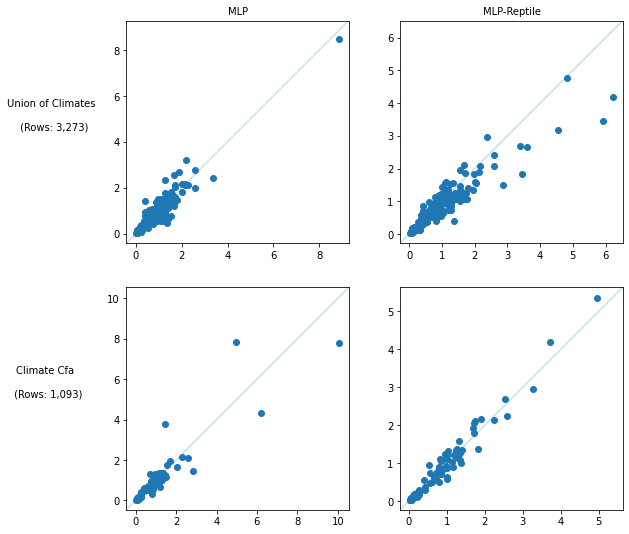

In [46]:
base_path = "/Users/saraawad/Desktop/PlotOutput/Scatter/Experiment B/"

def plot_actual_vs_predicted_scatter_bisector_stacked(y_test_list, y_predict_list, titles):
    figures_count = len(y_test_list)
    columns = 2
    rows = 2
    fig, axs = plt.subplots(rows, columns, figsize=(9, 9))
    print(axs.shape)
    index = 0
    for row in range(rows):
        for column in range(columns):
            y_test = y_test_list[index]
            y_predict = y_predict_list[index]
            row_plt = row
            col_plt = column
            index+=1
            if column == 0 and row == 0:
                axs[row_plt, col_plt].set_title(titles[column], fontsize='medium') 
            elif column == 1 and row == 0 :
                axs[row_plt, col_plt].set_title(titles[column], fontsize='medium') 
            elif column == 2 and row == 0:
                axs[row_plt, col_plt].set_title(titles[column], fontsize='medium') 
            
            if column == 0 and row == 0:
                axs[row_plt, col_plt].set_ylabel('Union of Climates \n\n (Rows: 3,273)',
                                                 labelpad=60,
                                                 fontsize='medium',
                                                 rotation=360) 
            elif column == 0 and row == 1 :
                axs[row_plt, col_plt].set_ylabel('Climate Cfa \n\n (Rows: 1,093)',
                                                 labelpad=60,
                                                 fontsize='medium',
                                                 rotation=360) 
#             elif column == 0 and row == 2:
#                 axs[row_plt, col_plt].set_ylabel('Cluster Cwa', fontsize='medium') 
            axs[row_plt, col_plt].scatter(y_test, y_predict)
            lims = [
                   np.min([axs[row_plt, col_plt].get_xlim(), axs[row_plt, col_plt].get_ylim()]),  # min of both axes
                   np.max([axs[row_plt, col_plt].get_xlim(), axs[row_plt, col_plt].get_ylim()]),  # max of both axes
            ]
            axs[row_plt, col_plt].plot(lims, lims, 'k-', c='lightblue', alpha=0.75, zorder=0)
            axs[row_plt, col_plt].set_aspect('equal')
            axs[row_plt, col_plt].set_xlim(lims)
            axs[row_plt, col_plt].set_ylim(lims)
#             axs[row_plt, col_plt].set_title(titles[column])
    plt.show()

y_test_list, y_predict_list = [], []

physical_output = 'Eeflux_ET'
# real_output = 'LE_bowen_corr_mm'
# predicted_output = 'LE_bowen_corr_pred

real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'

def export_physics(path):
    df_test = pd.read_csv(path, delimiter=',')
    df_test.loc[(df_test[physical_output] < 0.3), physical_output] = 0.3
    df_test.loc[(df_test[physical_output] > 15), physical_output] = 15
    
    df_test["expB_true"] = df_test[physical_output] / df_test[real_output]
    df_test["expB_predict"] = df_test[physical_output] / df_test[predicted_output]
    test_list = [np.array(df_test['expB_true'])]
    predict_list = [np.array(df_test['expB_predict'])]
    return test_list, predict_list

def export_model(path):
    df_test = pd.read_csv(path, delimiter=',')
    df_test.loc[(df_test[physical_output] < 0.3), physical_output] = 0.3
    df_test.loc[(df_test[physical_output] > 15), physical_output] = 15
    test_list = [np.array(df_test[real_output])]
    predict_list = [np.array(df_test[predicted_output])]
    return test_list, predict_list

# Row 1: Worst is Union
# Base Model
input_path = base_path + "mlp_all_fs2_output_residual.csv"
test_list, predict_list = export_physics(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

# Best Model
input_path = base_path + "meta_all_fs2_output_residual.csv"
test_list, predict_list = export_physics(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

######################################

# Row 2: Cfa

# Base Model
input_path = base_path + "mlp_cfa_fs2_output_residual.csv"
test_list, predict_list = export_physics(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

# Best Model
input_path = base_path + "meta_cfa_fs2_output_residual.csv"
test_list, predict_list = export_physics(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

######################################

# # Row 2: Cwa
# # Base Model
# input_path = base_path + "cwa_output_residual.csv"
# test_list, predict_list = export_physics(input_path)
# y_test_list.extend(test_list)
# y_predict_list.extend(predict_list)

# # Best Model
# input_path = base_path + "fs_meta_cwa_output_residual.csv"
# test_list, predict_list = export_physics(input_path)
# y_test_list.extend(test_list)
# y_predict_list.extend(predict_list)

# print(len(y_predict_list))


titles = ['MLP', 'MLP-Reptile']
plot_actual_vs_predicted_scatter_bisector_stacked(y_test_list, y_predict_list, titles)

# Density Plots Climates: Real ET

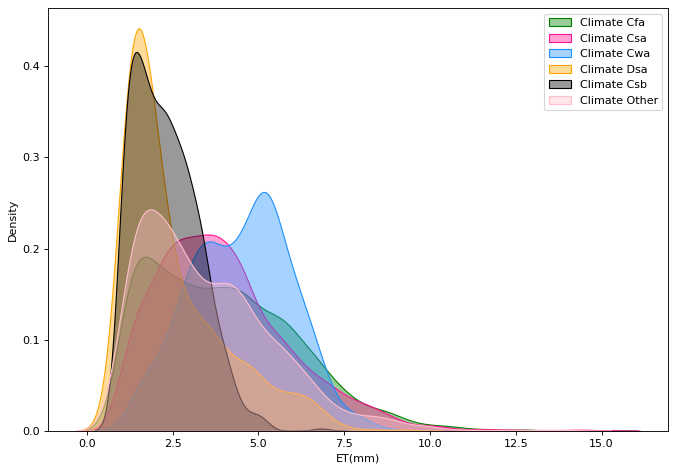

In [79]:
import seaborn as sns

#read data
df = pd.read_csv("/Users/saraawad/Desktop/All_Manual_Daily_Albedo_NDVI_LST_Cleaned.csv")
#drop na
df.dropna(inplace=True)

#set output variable between 1 and 15 only
real_ET = "LE_bowen_corr_mm"
real_ET = "LE_bowen_corr(mm)"
df = df[df[real_ET].between(1, 15)]
df_dict = {}
climates = ['Cfa', 'Csa', 'Dsa', 'Cwa', 'Csb', 'Other']
for climate in climates:
    df_dict[climate] = df[df["Climate"] == climate]

# Draw Plot
plt.figure(figsize=(10, 7), dpi= 80)
sns.kdeplot(df_dict['Cfa'][real_ET], shade=True, color="green", label="Climate Cfa", alpha=.4)
sns.kdeplot(df_dict['Csa'][real_ET], shade=True, color="deeppink", label="Climate Csa", alpha=.4)
sns.kdeplot(df_dict['Cwa'][real_ET], shade=True, color="dodgerblue", label="Climate Cwa", alpha=.4)
sns.kdeplot(df_dict['Dsa'][real_ET], shade=True, color="orange", label="Climate Dsa", alpha=.4)
sns.kdeplot(df_dict['Csb'][real_ET], shade=True, color="black", label="Climate Csb", alpha=.4)
sns.kdeplot(df_dict['Other'][real_ET], shade=True, color="pink", label="Climate Other", alpha=.4)

# Decoration
plt.legend()
plt.xlabel('ET(mm)')
# plt.xlim([1,15])
plt.show()

# Density Plots Seasons: Real ET

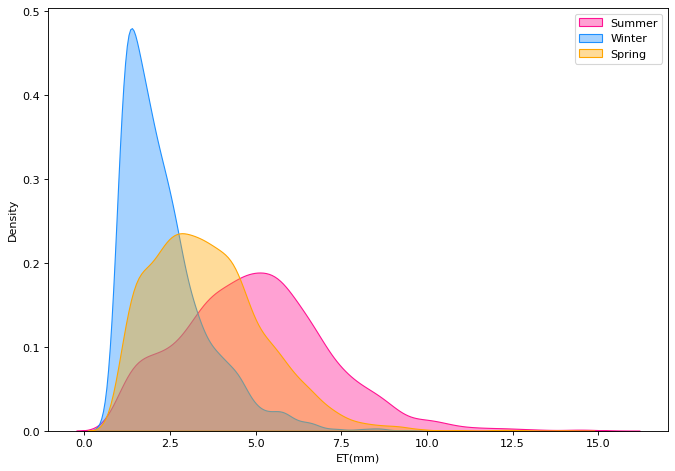

In [78]:
import seaborn as sns

base_path = "/Users/saraawad/Desktop/PlotOutput/DensityPlots/"
file_path = base_path + "kmeans_TA_Cluster_"

real_ET = "LE_bowen_corr_mm"
real_ET = "LE_bowen_corr(mm)"
df = df[df[real_ET].between(1, 15)]

seasons = ["Summer", "Winter", "Spring"]
colors = ["deeppink", "dodgerblue", "orange"]

plt.figure(figsize=(10, 7), dpi= 80)
for i in range(0,3):
    df_season = pd.read_csv(file_path + str(i) + ".csv")
    sns.kdeplot(df_season[real_ET], shade=True, color=colors[i], label=seasons[i], alpha=.4)
    #drop na

plt.legend()
plt.xlabel('ET(mm)')
plt.show()

# Density Plots: Testing all Climates Randomly

climates ['Other' 'Cfa' 'Csb' 'Csa' 'Dsa' 'Cwa']
/Users/saraawad/Desktop/PlotOutput/Lineplots/deepensemble/Other_test_dataset_.csv
/Users/saraawad/Desktop/PlotOutput/Lineplots/deepensemble/Cfa_test_dataset_.csv
/Users/saraawad/Desktop/PlotOutput/Lineplots/deepensemble/Csb_test_dataset_.csv
/Users/saraawad/Desktop/PlotOutput/Lineplots/deepensemble/Csa_test_dataset_.csv
/Users/saraawad/Desktop/PlotOutput/Lineplots/deepensemble/Dsa_test_dataset_.csv
/Users/saraawad/Desktop/PlotOutput/Lineplots/deepensemble/Cwa_test_dataset_.csv


<Figure size 1040x640 with 0 Axes>

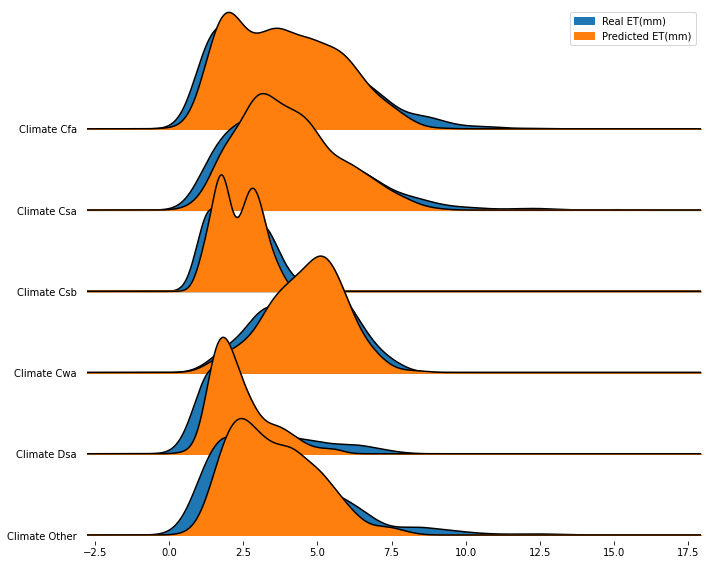

In [8]:
import joypy

real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'

new_real_ET = 'Real ET(mm)'
new_predicted_ET = 'Predicted ET(mm)'

base_path = "/Users/saraawad/Desktop/"
input_path = base_path + "All_Manual_Daily_Albedo_NDVI_LST_Cleaned.csv"
df_all = pd.read_csv(input_path, delimiter=',')
df_all.dropna(inplace=True)
df_all = df_all[df_all[real_output].between(1, 15)]

climates = df_all["Climate"].unique()
print("climates", climates)

# file_name = base_path + "PlotOutput/Lineplots/"
file_name = base_path + "PlotOutput/Lineplots/deepensemble/"
df_climates = []
for i in range(len(climates)):
    climate = climates[i]
#     file_path = file_name + climate + "_reptile_test_dataset.csv"
    file_path = file_name + climate + "_test_dataset_.csv"
    df_climate = pd.read_csv(file_path)
    df_climate["Climate"] = "Climate " + climate
    df_climate[predicted_output] = df_climate[predicted_output].str.strip('[]').astype(float)
    df_climate = df_climate.rename(columns={real_output: new_real_ET, predicted_output: new_predicted_ET})
    print(file_path)
    df_climates.append(df_climate)

df_climates = pd.concat([df_climates[0],
                         df_climates[1],
                         df_climates[2],
                         df_climates[3],
                        df_climates[4],
                        df_climates[5]], axis=0)

plt.figure(figsize=(13,8), dpi= 80)


fig, axes = joypy.joyplot(df_climates,
                          column=[new_real_ET, new_predicted_ET],
                          by="Climate",
                          ylim='own',
                          legend=True,
                          figsize=(10, 8))
plt.show()

# Density Plots: Testing on Climates

climates ['Other' 'Cfa' 'Csb' 'Csa' 'Dsa' 'Cwa']
/Users/saraawad/Desktop/PlotOutput/Other_reptile_test_dataset.csv
/Users/saraawad/Desktop/PlotOutput/Cfa_reptile_test_dataset.csv
/Users/saraawad/Desktop/PlotOutput/Csb_reptile_test_dataset.csv
/Users/saraawad/Desktop/PlotOutput/Csa_reptile_test_dataset.csv
/Users/saraawad/Desktop/PlotOutput/Dsa_reptile_test_dataset.csv
/Users/saraawad/Desktop/PlotOutput/Cwa_reptile_test_dataset.csv


<Figure size 1040x640 with 0 Axes>

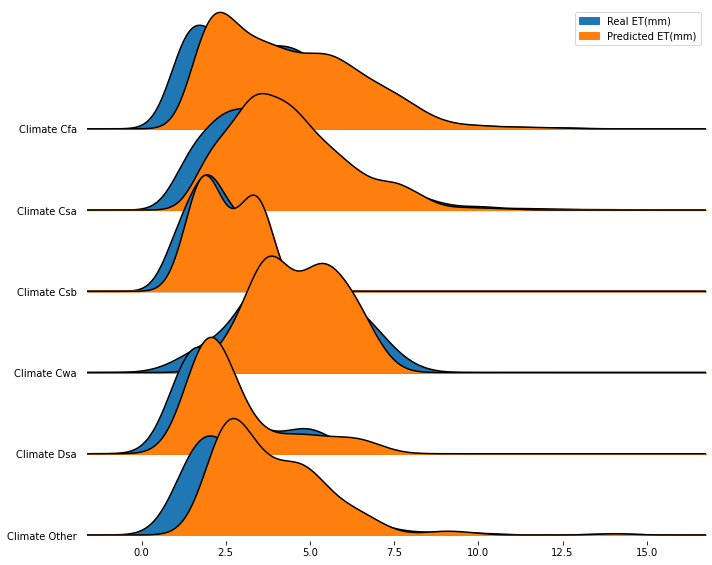

In [176]:
import joypy

real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'

new_real_ET = 'Real ET(mm)'
new_predicted_ET = 'Predicted ET(mm)'

base_path = "/Users/saraawad/Desktop/"
input_path = base_path + "All_Manual_Daily_Albedo_NDVI_LST_Cleaned.csv"
df_all = pd.read_csv(input_path, delimiter=',')
df_all.dropna(inplace=True)
df_all = df_all[df_all[real_output].between(1, 15)]

climates = df_all["Climate"].unique()
print("climates", climates)

file_name = base_path + "PlotOutput/"
df_climates = []
for i in range(len(climates)):
    climate = climates[i]
    file_path = file_name + climate + "_reptile_test_dataset.csv"
    df_climate = pd.read_csv(file_path)
    df_climate["Climate"] = "Climate " + climate
    df_climate = df_climate.rename(columns={real_output: new_real_ET, predicted_output: new_predicted_ET})
    print(file_path)
    df_climates.append(df_climate)

df_climates = pd.concat([df_climates[0],
                         df_climates[1],
                         df_climates[2],
                         df_climates[3],
                        df_climates[4],
                        df_climates[5]], axis=0)

plt.figure(figsize=(13,8), dpi= 80)


fig, axes = joypy.joyplot(df_climates,
                          column=[new_real_ET, new_predicted_ET],
                          by="Climate",
                          ylim='own',
                          legend=True,
                          figsize=(10, 8))
plt.show()

# Density Plots: Testing all Seasons

/Users/saraawad/Desktop/PlotOutput/DensityPlots/Summer_reptile_test_dataset.csv
/Users/saraawad/Desktop/PlotOutput/DensityPlots/Winter_reptile_test_dataset.csv
/Users/saraawad/Desktop/PlotOutput/DensityPlots/Spring_reptile_test_dataset.csv


<Figure size 1040x640 with 0 Axes>

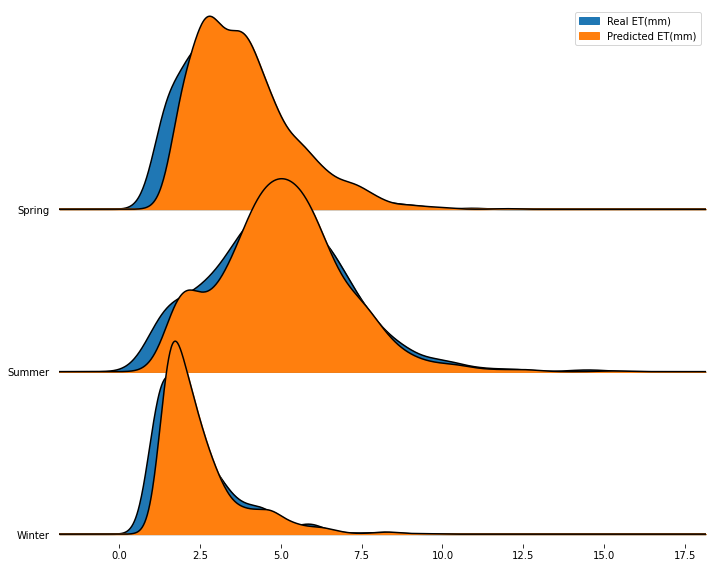

In [124]:
import joypy

real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'

new_real_ET = 'Real ET(mm)'
new_predicted_ET = 'Predicted ET(mm)'

seasons = ["Summer", "Winter", "Spring"]
colors = ["deeppink", "dodgerblue", "orange"]

file_name = base_path + "PlotOutput/DensityPlots/"
file_name = base_path + "PlotOutput/DensityPlots/"
df_seasons = []
for i in range(0, 3):
    season = seasons[i]
#     file_path = file_name + season +  "_reptile_test_dataset.csv"
    file_path = file_name + season +  "_reptile_test_dataset.csv"
    df_season = pd.read_csv(file_path)
    df_season["Season"] = seasons[i]
    df_season[predicted_output] = df_season[predicted_output].str.strip('[]').astype(float)
    df_season = df_season.rename(columns={real_output: new_real_ET, predicted_output: new_predicted_ET})
    print(file_path)
    df_seasons.append(df_season)

df_seasons = pd.concat([df_seasons[0],
                         df_seasons[1],
                         df_seasons[2]], axis=0)

plt.figure(figsize=(13,8), dpi= 80)


fig, axes = joypy.joyplot(df_seasons,
                          column=[new_real_ET, new_predicted_ET],
                          by="Season",
                          ylim='own',
                          legend=True,
                          figsize=(10, 8))
plt.show()

# Line plots

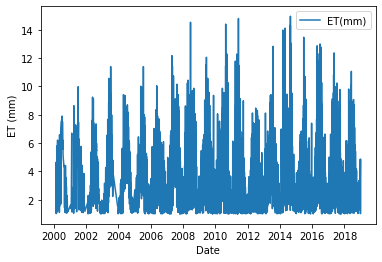

In [86]:
real_output = 'LE_bowen_corr(mm)'

def export_model(path):
    df_test = pd.read_csv(path, delimiter=',')
    df_test = df_test[df_test[real_ET].between(1, 15)]
    df_test['Date'] = pd.to_datetime(df_test.Date)
    df_test.sort_values(by=['Date'], inplace=True, ascending=True)
    df_test = df_test.set_index('Date')
    return df_test

base_path = "/Users/saraawad/Desktop/"
input_path = base_path + "All_Manual_Daily_Albedo_NDVI_LST_Cleaned.csv"
df = export_model(input_path)
plt.plot(df.index.values, df[real_output])
    
labels = ["ET(mm)"]
plt.legend(labels, loc="upper right")
plt.xlabel('Date')
plt.ylabel('ET (mm)')
plt.show()


['Cfa' 'Other' 'Csb' 'Csa' 'Cwa' 'Dsa']


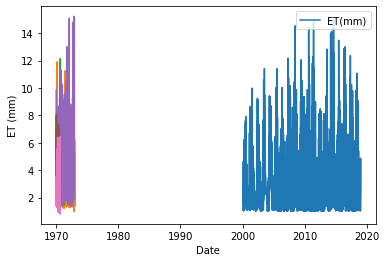

In [125]:
real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'

def export_model(path):
    df_test = pd.read_csv(path, delimiter=',')
    df_test = df_test[df_test[real_ET].between(1, 15)]
    df_test['Date'] = pd.to_datetime(df_test.Date)
    df_test.sort_values(by=['Date'], inplace=True, ascending=True)
    df_test = df_test.set_index('Date')
    return df_test

input_path = "/Users/saraawad/Desktop/All_Manual_Daily_Albedo_NDVI_LST_Cleaned.csv"
df_all = export_model(input_path)

climates = df["Climate"].unique()
print(climates)

plt.plot(df_all.index.values, np.array(df_all[real_output]))

file_name = base_path + "PlotOutput/Lineplots/"
for i in range(len(climates)):
    climate = climates[i]
    file_path = file_name + climate + "_reptile_test_dataset.csv"
    df_climate = pd.read_csv(file_path, delimiter=',')
    plt.plot(df_climate.index.values, np.array(df_climate[predicted_output]))
    
labels = ["ET(mm)"]
plt.legend(labels, loc="upper right")
plt.xlabel('Date')
plt.ylabel('ET (mm)')
plt.show()


# Box plots for All Clusters: Experiment A

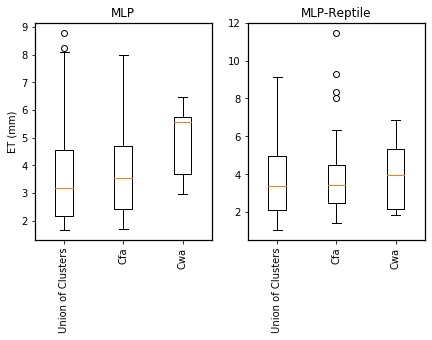

In [234]:
fig = plt.figure()
ax1 = fig.add_subplot(121)

physical_output = 'Eeflux_ET'
# real_output = 'LE_bowen_corr_mm'
# predicted_output = 'LE_bowen_corr_pred

real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'

def plot_actual_vs_predicted_scatter_bisector_stacked(y_test_list, y_predict_list, titles):
    figures_count = len(y_test_list)
    columns = 3
    rows = 3
    fig, axs = plt.subplots(rows, columns, figsize=(10,10))
    print(axs.shape)
    index = 0
    for row in range(rows):
        for column in range(columns):
            y_test = y_test_list[index]
            y_predict = y_predict_list[index]
            row_plt = row
            col_plt = column
            index+=1
            if column == 0 and row == 0:
                axs[row_plt, col_plt].set_title(titles[column], fontsize='medium') 
            elif column == 1 and row == 0 :
                axs[row_plt, col_plt].set_title(titles[column], fontsize='medium') 
            elif column == 2 and row == 0:
                axs[row_plt, col_plt].set_title(titles[column], fontsize='medium') 
            
            if column == 0 and row == 0:
                axs[row_plt, col_plt].set_ylabel('Union of Clusters', fontsize='medium') 
            elif column == 0 and row == 1 :
                axs[row_plt, col_plt].set_ylabel('Cluster Cfa', fontsize='medium') 
            elif column == 0 and row == 2:
                axs[row_plt, col_plt].set_ylabel('Cluster Cwa', fontsize='medium') 
            axs[row_plt, col_plt].scatter(y_test, y_predict)
            lims = [
                   np.min([axs[row_plt, col_plt].get_xlim(), axs[row_plt, col_plt].get_ylim()]),  # min of both axes
                   np.max([axs[row_plt, col_plt].get_xlim(), axs[row_plt, col_plt].get_ylim()]),  # max of both axes
            ]
            axs[row_plt, col_plt].plot(lims, lims, 'k-', alpha=0.75, zorder=0)
            axs[row_plt, col_plt].set_aspect('equal')
            axs[row_plt, col_plt].set_xlim(lims)
            axs[row_plt, col_plt].set_ylim(lims)
#             axs[row_plt, col_plt].set_title(titles[column])
    plt.show()

y_test_list, y_predict_list = [], []

physical_output = 'Eeflux_ET'
# real_output = 'LE_bowen_corr_mm'
# predicted_output = 'LE_bowen_corr_pred

real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'

def export_physics(path):
    df_test = pd.read_csv(path, delimiter=',')
    df_test.loc[(df_test[physical_output] < 0.3), physical_output] = 0.3
    df_test.loc[(df_test[physical_output] > 15), physical_output] = 15
    
    df_test["expA_true"] = df_test[real_output]
    df_test["expA_predict"] =  df_test[predicted_output]
    test_list = [np.array(df_test['expA_true'])]
    predict_list = [np.array(df_test['expA_predict'])]
    return test_list, predict_list

def export_model(path):
    df_test = pd.read_csv(path, delimiter=',')
    df_test.loc[(df_test[physical_output] < 0.3), physical_output] = 0.3
    df_test.loc[(df_test[physical_output] > 15), physical_output] = 15
    test_list = [np.array(df_test[real_output])]
    predict_list = [np.array(df_test[predicted_output])]
    return test_list, predict_list


base_path = "/Users/saraawad/Desktop/Plots/Scatter 1/"

# Plot box plot for base models
input_path = base_path + "mlp_output_residual.csv"
test_list, predict_list = export_model(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

input_path = base_path + "cfa_output_residual.csv"
test_list, predict_list = export_model(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

input_path = base_path + "cwa_output_residual.csv"
test_list, predict_list = export_model(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

ax1 = fig.add_subplot(121)
ax1.boxplot(y_predict_list, labels=['Union of Clusters', 'Cfa', 'Cwa'])
ax1.xaxis.set_tick_params(rotation=90)
ax1.title.set_text('MLP')
ax1.set_ylabel('ET (mm)')

# Plot box plot for best models
y_test_list, y_predict_list = [], []
input_path = base_path + "fs_meta_all_output_residual.csv"
test_list, predict_list = export_physics(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

input_path = base_path + "fs_meta_cfa_output_residual.csv"
test_list, predict_list = export_physics(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

input_path = base_path + "fs_meta_cwa_output_residual.csv"
test_list, predict_list = export_physics(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

ax2 = fig.add_subplot(122)
ax2.boxplot(y_predict_list, labels=['Union of Clusters', 'Cfa', 'Cwa'])
ax2.xaxis.set_tick_params(rotation=90)
ax2.title.set_text('MLP-Reptile')

fig.set_figheight(4)
fig.set_figwidth(7)

plt.show()

# Box Plots for All Clusters: Experiment B

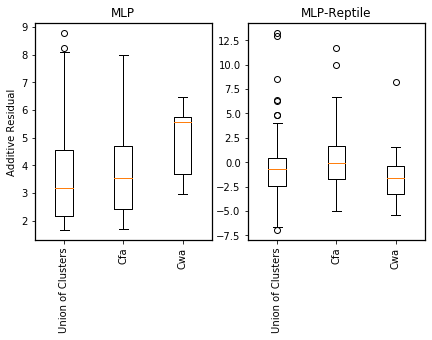

In [232]:
fig = plt.figure()
ax1 = fig.add_subplot(121)

physical_output = 'Eeflux_ET'
# real_output = 'LE_bowen_corr_mm'
# predicted_output = 'LE_bowen_corr_pred

real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'

def plot_actual_vs_predicted_scatter_bisector_stacked(y_test_list, y_predict_list, titles):
    figures_count = len(y_test_list)
    columns = 3
    rows = 3
    fig, axs = plt.subplots(rows, columns, figsize=(10,10))
    print(axs.shape)
    index = 0
    for row in range(rows):
        for column in range(columns):
            y_test = y_test_list[index]
            y_predict = y_predict_list[index]
            row_plt = row
            col_plt = column
            index+=1
            if column == 0 and row == 0:
                axs[row_plt, col_plt].set_title(titles[column], fontsize='medium') 
            elif column == 1 and row == 0 :
                axs[row_plt, col_plt].set_title(titles[column], fontsize='medium') 
            elif column == 2 and row == 0:
                axs[row_plt, col_plt].set_title(titles[column], fontsize='medium') 
            
            if column == 0 and row == 0:
                axs[row_plt, col_plt].set_ylabel('Union of Clusters', fontsize='medium') 
            elif column == 0 and row == 1 :
                axs[row_plt, col_plt].set_ylabel('Cluster Cfa', fontsize='medium') 
            elif column == 0 and row == 2:
                axs[row_plt, col_plt].set_ylabel('Cluster Cwa', fontsize='medium') 
            axs[row_plt, col_plt].scatter(y_test, y_predict)
            lims = [
                   np.min([axs[row_plt, col_plt].get_xlim(), axs[row_plt, col_plt].get_ylim()]),  # min of both axes
                   np.max([axs[row_plt, col_plt].get_xlim(), axs[row_plt, col_plt].get_ylim()]),  # max of both axes
            ]
            axs[row_plt, col_plt].plot(lims, lims, 'k-', alpha=0.75, zorder=0)
            axs[row_plt, col_plt].set_aspect('equal')
            axs[row_plt, col_plt].set_xlim(lims)
            axs[row_plt, col_plt].set_ylim(lims)
#             axs[row_plt, col_plt].set_title(titles[column])
    plt.show()

y_test_list, y_predict_list = [], []

physical_output = 'Eeflux_ET'
# real_output = 'LE_bowen_corr_mm'
# predicted_output = 'LE_bowen_corr_pred

real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'

def export_physics(path):
    df_test = pd.read_csv(path, delimiter=',')
    df_test.loc[(df_test[physical_output] < 0.3), physical_output] = 0.3
    df_test.loc[(df_test[physical_output] > 15), physical_output] = 15
    
    df_test["expB_true"] = df_test[physical_output] - df_test[real_output]
    df_test["expB_predict"] =  df_test[physical_output] - df_test[predicted_output]
    test_list = [np.array(df_test['expB_true'])]
    predict_list = [np.array(df_test['expB_predict'])]
    return test_list, predict_list

def export_model(path):
    df_test = pd.read_csv(path, delimiter=',')
    df_test.loc[(df_test[physical_output] < 0.3), physical_output] = 0.3
    df_test.loc[(df_test[physical_output] > 15), physical_output] = 15
    test_list = [np.array(df_test[real_output])]
    predict_list = [np.array(df_test[predicted_output])]
    return test_list, predict_list


base_path = "/Users/saraawad/Desktop/Plots/Scatter 1/"

# Plot box plot for base models
input_path = base_path + "mlp_output_residual.csv"
test_list, predict_list = export_model(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

input_path = base_path + "cfa_output_residual.csv"
test_list, predict_list = export_model(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

input_path = base_path + "cwa_output_residual.csv"
test_list, predict_list = export_model(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

ax1 = fig.add_subplot(121)
ax1.boxplot(y_predict_list, labels=['Union of Clusters', 'Cfa', 'Cwa'])
ax1.xaxis.set_tick_params(rotation=90)
ax1.title.set_text('MLP')
ax1.set_ylabel('Additive Residual')


# Plot box plot for best models
y_test_list, y_predict_list = [], []
input_path = base_path + "fs_meta_all_output_residual.csv"
test_list, predict_list = export_physics(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

input_path = base_path + "fs_meta_cfa_output_residual.csv"
test_list, predict_list = export_physics(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

input_path = base_path + "fs_meta_cwa_output_residual.csv"
test_list, predict_list = export_physics(input_path)
y_test_list.extend(test_list)
y_predict_list.extend(predict_list)

ax2 = fig.add_subplot(122)
ax2.boxplot(y_predict_list, labels=['Union of Clusters', 'Cfa', 'Cwa'])
ax2.xaxis.set_tick_params(rotation=90)
ax2.title.set_text('MLP-Reptile')

fig.set_figheight(4)
fig.set_figwidth(7)
   
plt.show()

best shape (144, 39)


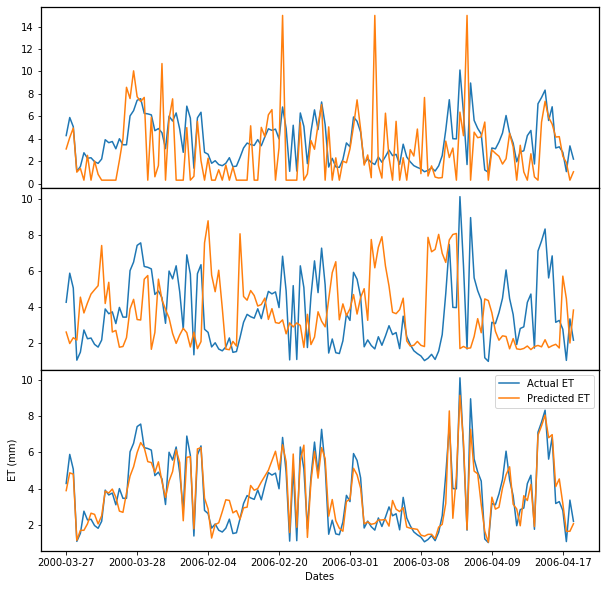

# Line Plot: Base and Best Point for All Sites

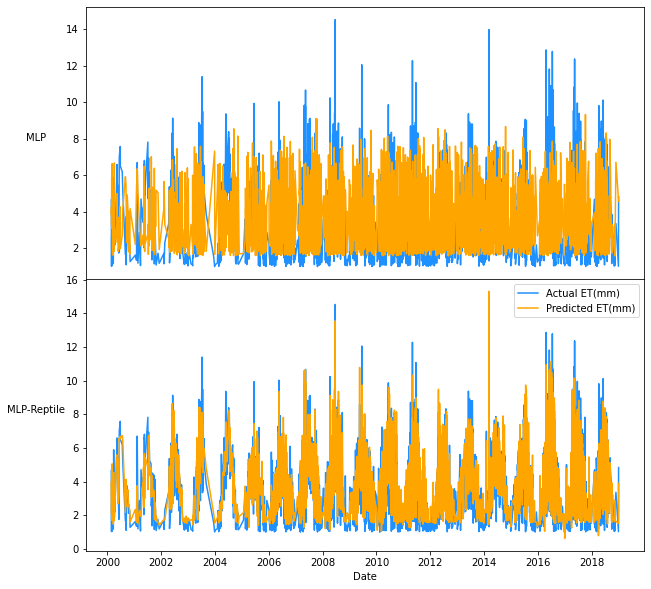

In [163]:
base_path = "/Users/saraawad/Desktop/PlotOutput/Scatter/Experiment A/Point/"

# real_output = 'LE_bowen_corr_mm'
# predicted_output = 'LE_bowen_corr_pred

real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'

input_path = base_path + "mlp_all_fs2_test_dataset.csv"
df_test2 = pd.read_csv(input_path, delimiter=',')
df_test2["Base predicted"] = df_test2[predicted_output]

input_path = base_path + "meta_all_fs2_test_dataset.csv"
df_test1 = pd.read_csv(input_path, delimiter=',')
df_test1["Best predicted"] = df_test1[predicted_output]

df_all = pd.concat([df_test1, df_test2], axis=1)

columnsToTake = ['TA', 'TA-1', 'TA-2', 'TA-3', 'TA-4', 'TA-5',
       'EEflux LST', 'EEflux LST-1', 'EEflux LST-2', 'EEflux LST-3',
       'EEflux LST-4', 'EEflux LST-5', 'WS', 'WS-1', 'WS-2', 'RH', 'RH-1',
       'RH-2', 'RH-3', 'EEflux NDVI', 'EEflux NDVI-1', 'EEflux NDVI-2',
       'EEflux Albedo', 'EEflux Albedo-1', 'EEflux Albedo-2', 'Site Id_1',
       'Site Id_2', 'Site Id_3', 'Site Id_4', 'Site Id_5', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Site Id', real_output,
       predicted_output, 'Date', 'Base predicted', 'Best predicted']
df_all = df_all[columnsToTake]
df_all = df_all.loc[:,~df_all.columns.duplicated()]
df_all.columns

columnsToPlot = [real_output, 'Base predicted', 'Best predicted']

df_all['Year'] = pd.DatetimeIndex(df_all['Date']).year
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all.sort_values(by=['Date'], inplace=True, ascending=True)
df_all = df_all.set_index('Date')
# df_all = df_all[df_all["Site Id"] == "US-Skr"]

fig, axs = plt.subplots(2, 1, figsize=(10,10),  sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

colors = ['dodgerblue', 'orange']
for i in range(2):
    # Plot each graph, and manually set the y tick values
    if i == 0:
        axs[i].plot(df_all.index.values, np.array(df_all[real_output]), color=colors[0])
        axs[i].plot(df_all.index.values, np.array(df_all['Base predicted']), color=colors[1])
        axs[i].set_ylabel('MLP', rotation=360, labelpad=30, fontsize='medium')
        
    elif i == 1:
        axs[i].plot(df_all.index.values, np.array(df_all[real_output]), color=colors[0])
        axs[i].plot(df_all.index.values, np.array(df_all['Best predicted']), color=colors[1])
        axs[i].set_ylabel('MLP-Reptile', rotation=360, labelpad=30, fontsize='medium')

labels = ["Actual ET(mm)", "Predicted ET(mm)"]
plt.legend(labels, loc="upper right")
plt.xlabel('Date')
plt.show()

# Line Plot: Base and Best Point for Specific Site

sites ['FI-Jok' 'US-Wlr' 'US-Goo' 'DE-Kli' 'US-FR2' 'US-Me2' 'US-SO2' 'DK-Ris'
 'US-Kon' 'US-Skr' 'US-Ced' 'DE-Seh' 'US-AR2' 'US-AR1' 'US-Tw2' 'US-Tw3'
 'FR-Gri' 'US-A32' 'DE-RuS' 'US-Me6' 'US-A74' 'US-Bi2']


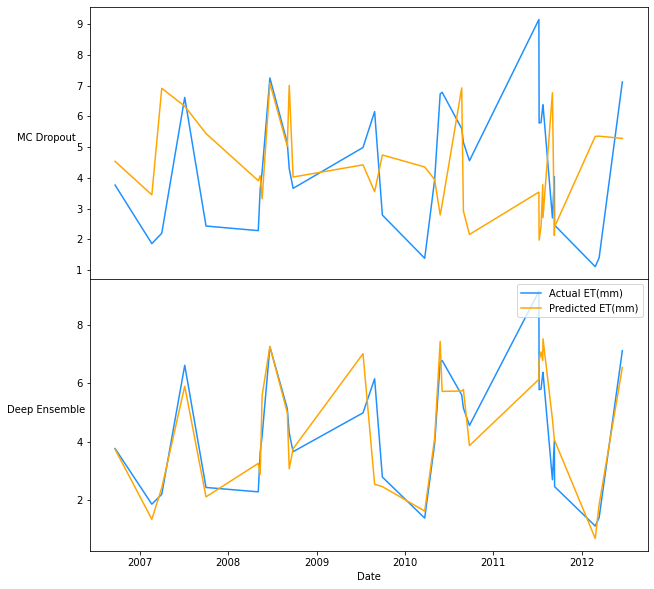

In [7]:
# base_path = "/Users/saraawad/Desktop/PlotOutput/Scatter/Experiment A/Point/"
base_path = "/Users/saraawad/Desktop/PlotOutput/Scatter/Experiment A/Proba/"

# real_output = 'LE_bowen_corr_mm'
# predicted_output = 'LE_bowen_corr_pred

real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'

# input_path = base_path + "mlp_all_fs2_test_dataset.csv"
input_path = base_path + "mcdropout_fs2_all_output_residual.csv"
df_test2 = pd.read_csv(input_path, delimiter=',')
df_test2[predicted_output] = df_test2[predicted_output].str.strip('[]').astype(float)
df_test2["Base predicted"] = df_test2[predicted_output]

# input_path = base_path + "meta_all_fs2_test_dataset.csv"
input_path = base_path + "deepensemble_fs2_all_output_residual.csv"
df_test1 = pd.read_csv(input_path, delimiter=',')
df_test1[predicted_output] = df_test1[predicted_output].str.strip('[]').astype(float)
df_test1["Best predicted"] = df_test1[predicted_output]

df_all = pd.concat([df_test1, df_test2], axis=1)

columnsToTake = ['TA', 'TA-1', 'TA-2', 'TA-3', 'TA-4', 'TA-5',
       'EEflux LST', 'EEflux LST-1', 'EEflux LST-2', 'EEflux LST-3',
       'EEflux LST-4', 'EEflux LST-5', 'WS', 'WS-1', 'WS-2', 'RH', 'RH-1',
       'RH-2', 'RH-3', 'EEflux NDVI', 'EEflux NDVI-1', 'EEflux NDVI-2',
       'EEflux Albedo', 'EEflux Albedo-1', 'EEflux Albedo-2', 'Site Id_1',
       'Site Id_2', 'Site Id_3', 'Site Id_4', 'Site Id_5', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Site Id', real_output,
       predicted_output, 'Date', 'Base predicted', 'Best predicted']
df_all = df_all[columnsToTake]
df_all = df_all.loc[:,~df_all.columns.duplicated()]
df_all.columns

columnsToPlot = [real_output, 'Base predicted', 'Best predicted']

df_all['Year'] = pd.DatetimeIndex(df_all['Date']).year
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all.sort_values(by=['Date'], inplace=True, ascending=True)
df_all = df_all.set_index('Date')

print("sites", df_all["Site Id"].unique())
df_all = df_all[df_all["Site Id"] == "US-Kon"]

fig, axs = plt.subplots(2, 1, figsize=(10,10),  sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

colors = ['dodgerblue', 'orange']
for i in range(2):
    # Plot each graph, and manually set the y tick values
    if i == 0:
        axs[i].plot(df_all.index.values, np.array(df_all[real_output]), color=colors[0])
        axs[i].plot(df_all.index.values, np.array(df_all['Base predicted']), color=colors[1])
#         axs[i].set_ylabel('MLP', rotation=360, labelpad=30, fontsize='medium')
        axs[i].set_ylabel('MC Dropout', rotation=360, labelpad=30, fontsize='medium')
        
    elif i == 1:
        axs[i].plot(df_all.index.values, np.array(df_all[real_output]), color=colors[0])
        axs[i].plot(df_all.index.values, np.array(df_all['Best predicted']), color=colors[1])
#         axs[i].set_ylabel('MLP-Reptile', rotation=360, labelpad=30, fontsize='medium')
        axs[i].set_ylabel('Deep Ensemble', rotation=360, labelpad=30, fontsize='medium')

labels = ["Actual ET(mm)", "Predicted ET(mm)"]
plt.legend(labels, loc="upper right")
plt.xlabel('Date')
plt.show()

best shape (251, 43)


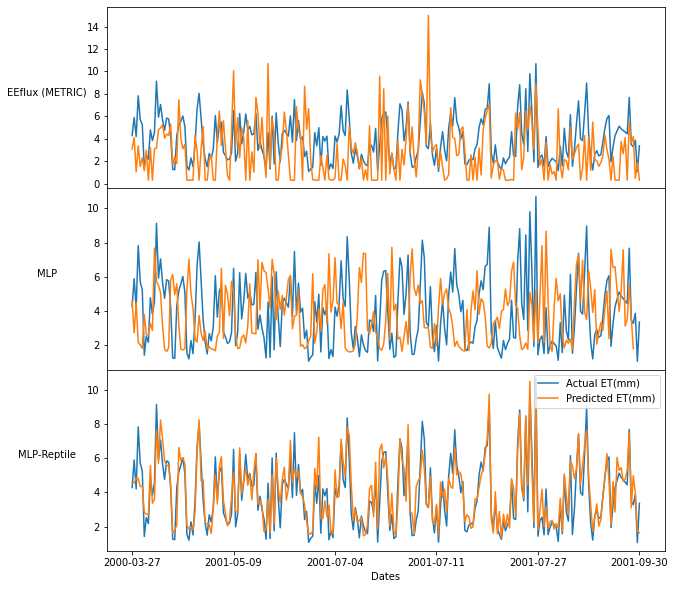

In [173]:
physical_output = 'Eeflux_ET'
# real_output = 'LE_bowen_corr_mm'
# predicted_output = 'LE_bowen_corr_pred

real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'

def export_modeling_results(path, predicted_column):
    df_test = pd.read_csv(path, delimiter=',')
    df_test['Date'] = pd.to_datetime(df_test.Date).dt.strftime('%Y-%m-%d')
    df_test.sort_values(by=['Date'], inplace=True, ascending=True)
    df_test.loc[(df_test[physical_output] < 0.3), physical_output] = 0.3
    df_test.loc[(df_test[physical_output] > 15), physical_output] = 15
    print("best shape", df_test.shape)
    return np.array(df_test[real_output]), np.array(df_test[predicted_column])

base_path = "/Users/saraawad/Desktop/PlotOutput/Scatter/Experiment A/Point/"
y_test_list = []
y_predict_list = []

#Best EEflux
input_path = base_path + "meta_all_fs2_output_residual.csv"
real_list, predict_list = export_modeling_results(input_path, physical_output)

y_test_list.append(real_list)
y_predict_list.append(predict_list)


#Base
input_path = base_path + "mlp_all_fs2_output_residual.csv"
df_test = pd.read_csv(input_path, delimiter=',')
df_test['Date'] = pd.to_datetime(df_test.Date).dt.strftime('%Y-%m-%d')
df_test.sort_values(by=['Date'], inplace=True, ascending=True)
df_test.loc[(df_test[physical_output] < 0.3), physical_output] = 0.3
df_test.loc[(df_test[physical_output] > 15), physical_output] = 15
# df_test = df_test.iloc[:144, :]

y_test_list.append(real_list)
y_predict_list.append(np.array(df_test[predicted_output]))

#Best 
input_path = base_path + "meta_all_fs2_output_residual.csv"
df_test = pd.read_csv(input_path, delimiter=',')
df_test['Date'] = pd.to_datetime(df_test.Date).dt.strftime('%Y-%m-%d')
df_test.sort_values(by=['Date'], inplace=True, ascending=True)
df_test.loc[(df_test[physical_output] < 0.3), physical_output] = 0.3
df_test.loc[(df_test[physical_output] > 15), physical_output] = 15

y_test_list.append(real_list)
y_predict_list.append(np.array(df_test[predicted_output]))

fig, axs = plt.subplots(len(y_test_list), 1, figsize=(10,10),  sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

for i in range(len(y_test_list)):
    # Plot each graph, and manually set the y tick values
    y_test = y_test_list[i]
    y_predict = y_predict_list[i]
    axs[i].plot(np.array(y_test))
    axs[i].plot(np.array(y_predict))
    if i == 0:
        axs[i].set_ylabel('EEflux (METRIC)', rotation=360, labelpad=40, fontsize='medium')
    elif i == 1:
        axs[i].set_ylabel('MLP', rotation=360, labelpad=40, fontsize='medium')
    elif i == 2:
        axs[i].set_ylabel('MLP-Reptile', rotation=360, labelpad=40, fontsize='medium')

labels = ["Actual ET(mm)", "Predicted ET(mm)"]
plt.legend(labels, loc="upper right")
plt.xlabel('Dates')
# plt.ylabel('Real & Predicted ET')

axs[2].set_xticklabels(df_test['Date'].values, rotation=0)
plt.show()




# Line Plot: Best Point for All Sites

sites ['US-Pon' 'US-Shd' 'US-WBW' 'FI-Jok' 'US-Wlr' 'US-Goo' 'DE-Kli' 'US-FR2'
 'US-Me2' 'US-Ced' 'US-SO2' 'DK-Ris' 'US-Kon' 'US-Skr' 'US-Snd' 'DE-Seh'
 'US-AR2' 'US-AR1' 'US-Tw2' 'US-Tw3' 'FR-Gri' 'US-Me6' 'US-A32' 'DE-RuS'
 'US-A74' 'US-Bi2']


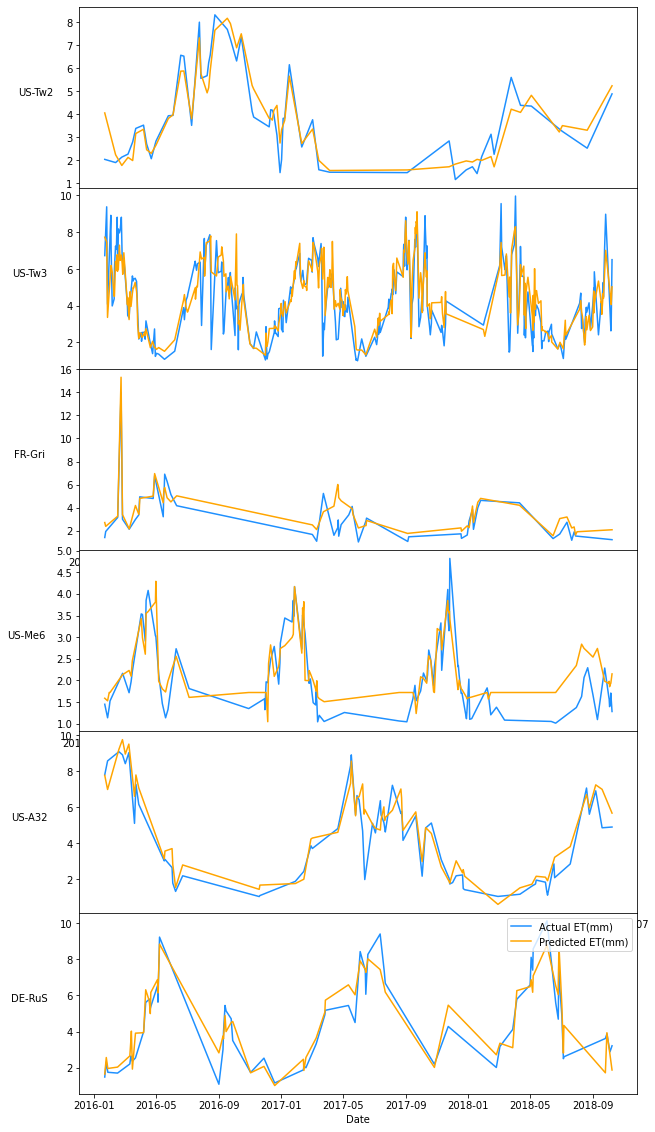

In [25]:
base_path = "/Users/saraawad/Desktop/PlotOutput/Scatter/Experiment A/Point/"

# real_output = 'LE_bowen_corr_mm'
# predicted_output = 'LE_bowen_corr_pred

real_output = 'LE_bowen_corr(mm)'
predicted_output = 'LE_bowen_corr(mm)_predicted'

input_path = base_path + "mlp_all_fs2_test_dataset.csv"
df_test2 = pd.read_csv(input_path, delimiter=',')
df_test2["Base predicted"] = df_test2[predicted_output]

input_path = base_path + "meta_all_fs2_test_dataset.csv"
df_test1 = pd.read_csv(input_path, delimiter=',')
df_test1["Best predicted"] = df_test1[predicted_output]

df_all = pd.concat([df_test1, df_test2], axis=1)

columnsToTake = ['TA', 'TA-1', 'TA-2', 'TA-3', 'TA-4', 'TA-5',
       'EEflux LST', 'EEflux LST-1', 'EEflux LST-2', 'EEflux LST-3',
       'EEflux LST-4', 'EEflux LST-5', 'WS', 'WS-1', 'WS-2', 'RH', 'RH-1',
       'RH-2', 'RH-3', 'EEflux NDVI', 'EEflux NDVI-1', 'EEflux NDVI-2',
       'EEflux Albedo', 'EEflux Albedo-1', 'EEflux Albedo-2', 'Site Id_1',
       'Site Id_2', 'Site Id_3', 'Site Id_4', 'Site Id_5', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Site Id', real_output,
       predicted_output, 'Date', 'Base predicted', 'Best predicted']
df_all = df_all[columnsToTake]
df_all = df_all.loc[:,~df_all.columns.duplicated()]
df_all.columns

columnsToPlot = [real_output, 'Base predicted', 'Best predicted']

df_all['Year'] = pd.DatetimeIndex(df_all['Date']).year
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all.sort_values(by=['Date'], inplace=True, ascending=True)
df_all = df_all.set_index('Date')

sites = df_all["Site Id"].unique()
print("sites", sites)

sub_sites = sites[18:24]
# df_all = df_all[df_all["Site Id"] == "US-Ced"]

fig, axs = plt.subplots(len(sub_sites), 1, figsize=(10,20),  sharex=False)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

colors = ['dodgerblue', 'orange']

for i in range(len(sub_sites)):
    site = sub_sites[i]
    df_site = df_all[df_all['Site Id'] == site]
    axs[i].plot(df_site.index.values, np.array(df_site[real_output]), color=colors[0])
    axs[i].plot(df_site.index.values, np.array(df_site['Best predicted']), color=colors[1])
    axs[i].set_ylabel(site, rotation=360, labelpad=30, fontsize='medium')

labels = ["Actual ET(mm)", "Predicted ET(mm)"]
plt.legend(labels, loc="upper right")
plt.xlabel('Date')
# plt.show()
output_path = "/Users/saraawad/Desktop/"
plt.savefig(output_path + "allsites" + '.png')